# SVM и его ядра
__Суммарное количество баллов: 10__

In [19]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [17]:
blobs = pandas.read_csv('hw7_data/blobs2.csv')
X_blobs = blobs.drop(['label'], axis=1)
y_blobs = blobs['label']
X_blobs_train, X_blobs_test, y_blobs_train, y_blobs_test = train_test_split(X_blobs, y_blobs, train_size=0.8, shuffle=True)

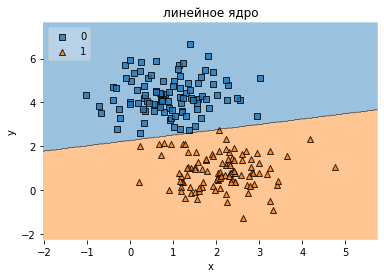

In [22]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))
clf.fit(X_blobs_train, y_blobs_train)
plot_decision_regions(numpy.array(X_blobs_test), numpy.array(y_blobs_test), clf=clf, legend=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('линейное ядро')
plt.show()

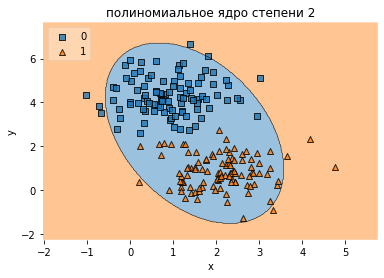

In [23]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=2))
clf.fit(X_blobs_train, y_blobs_train)
plot_decision_regions(numpy.array(X_blobs_test), numpy.array(y_blobs_test), clf=clf, legend=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('полиномиальное ядро степени 2')
plt.show()

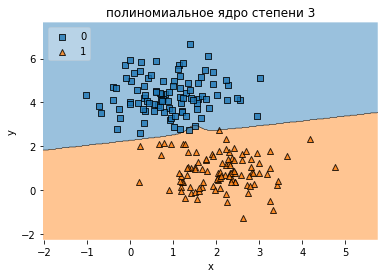

In [24]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=3))
clf.fit(X_blobs_train, y_blobs_train)
plot_decision_regions(numpy.array(X_blobs_test), numpy.array(y_blobs_test), clf=clf, legend=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ядро степени 3')
plt.show()

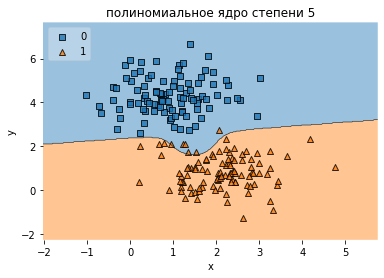

In [25]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=5))
clf.fit(X_blobs_train, y_blobs_train)
plot_decision_regions(numpy.array(X_blobs_test), numpy.array(y_blobs_test), clf=clf, legend=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('полиномиальное ядро степени 5')
plt.show()

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=2))
clf.fit(X_blobs_train, y_blobs_train)
plot_decision_regions(numpy.array(X_blobs_test), numpy.array(y_blobs_test), clf=clf, legend=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('полиномиальное ядро степени 2')
plt.show()

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [8]:
cancer = pandas.read_csv('hw7_data/cancer.csv')
X_cancer = cancer.drop(['label'], axis=1)
y_cancer = cancer['label'].apply(lambda t: 1 if t == 'M' else 0)
spam = pandas.read_csv('hw7_data/spam.csv')
X_spam = spam.drop(['label'], axis=1)
y_spam = spam['label']
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, train_size=0.8, shuffle=False)
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(X_spam, y_spam, train_size=0.8, shuffle=True)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))

In [9]:
%time clf.fit(X_cancer_train, y_cancer_train)
%time pred_cancer = clf.predict_proba(X_cancer_test)
print("cancer AUC:", roc_auc_score(y_cancer_test, pred_cancer[:, 1]))

CPU times: user 87.3 ms, sys: 0 ns, total: 87.3 ms
Wall time: 85.2 ms
CPU times: user 4.06 ms, sys: 0 ns, total: 4.06 ms
Wall time: 3.62 ms
cancer AUC: 0.9995629370629371


In [10]:
%time clf.fit(X_spam_train, y_spam_train)
%time pred_spam = clf.predict_proba(X_spam_test)
print("spam AUC:", roc_auc_score(y_spam_test, pred_spam[:, 1]))

CPU times: user 2.75 s, sys: 18.4 ms, total: 2.77 s
Wall time: 2.77 s
CPU times: user 115 ms, sys: 3.71 ms, total: 119 ms
Wall time: 119 ms
spam AUC: 0.978269439243126


svm.SVC сопоставим по скорости обучения с lgb.LGBMClassifier и в разы/десятки раз быстрее других классификаторов из HW4 при сопоставимой ROC AUC